<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../../Index.ipynb"><< Index</a>
<br>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=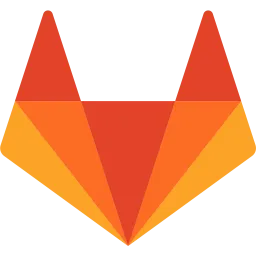" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?sort=startDate%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CCase%20studies%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=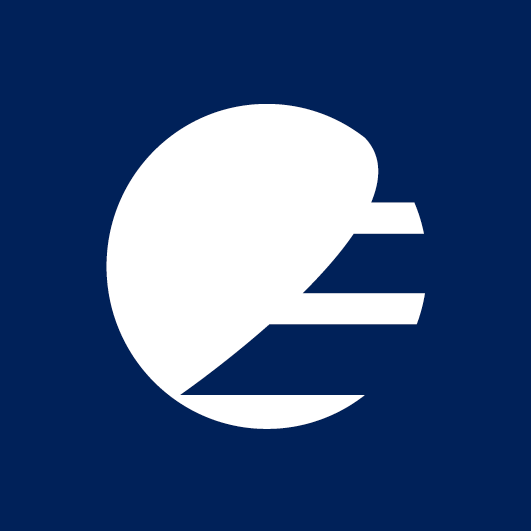" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?labpath=Case_studies%2FCSM_ocean%2FMed_MHW_2023%2FMed_MHW.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub-wekeo.apps.eumetsat.dpi.wekeo.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/CSM_ocean/Med_MHW_2023/Med_MHW.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://data.marine.copernicus.eu/register" target="_blank">A Copernicus Marine Service (CMEMS) account</a>** to download data from the CMEMS Data Store

There are no prerequisite notebooks for this module, but you may wish to look at the following notebooks on using level-2 SLSTR and level-4 OSTIA/C3S SST data; <br>

- **<a href="../Atl_Med_anomalies/Atlantic_Med_SST_anomalies.ipynb" target="_blank">Sea surface temperature anomalies in the Northern Atlantic and Mediterranean Sea</a>**
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-SLSTR" target="_blank">Learn SLSTR (EUMETSAT Gitlab)</a>**

</div>
<hr>

# Marine heatwaves in the Mediterranean Sea

### <a id='dataused'>Data used

| Dataset | EUMETSAT Data Store<br>collection ID | EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description | Copernicus Marine<br>Data Store product ID | Copernicus Marine<br>product description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Global OSTIA SST (Reprocessed) | - | - | EO:MO:DAT:SST_GLO_SST_L4_REP_OBSERVATIONS_010_011 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_GLO_SST_L4_REP_OBSERVATIONS_010_011" target="_blank">Description</a> | SST_GLO_SST_L4_REP_OBSERVATIONS_010_011 | <a href="https://data.marine.copernicus.eu/product/SST_GLO_SST_L4_REP_OBSERVATIONS_010_011/description" target="_blank">Description</a>|
| ESA SST CCI and C3S reprocessed sea surface temperature analyses | - | - | EO:MO:DAT:SST_GLO_SST_L4_REP_OBSERVATIONS_010_024 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_GLO_SST_L4_REP_OBSERVATIONS_010_024" target="_blank">Description</a> | SST_GLO_SST_L4_REP_OBSERVATIONS_010_024 | <a href="https://data.marine.copernicus.eu/product/SST_GLO_SST_L4_REP_OBSERVATIONS_010_024/description" target="_blank">Description</a>|

### Learning outcomes

At the end of this notebook you will know;
* where level-2 sea surface temperature (SST) data sets from EUMETSAT contributes to downstream Copernicus Marine Service products
* how to download level-4 SST products from the Copernicus Marine Service using the **Copernicus Marine API** client
* use time series of satellite SST data to investigate marine heatwaves using the `xmhw` package

### Outline

Concurrent with the past century's persistent warming of global oceans, marine heatwaves (periods of extreme regional ocean warming) have become more frequent and more extreme [[1]](#ref1). They occur in many areas around the world, from the Pacific Ocean to the Atlantic Ocean to the Mediterranean Sea [[2]](#ref2). Marine heatwaves can occur over thousands to millions of square kilometres, can persist for weeks to months, and can occur over significant depth. 

<figure><center>
  <img src='https://tos.org/oceanography/assets/images/content/31-2_hobday_f2.jpg' width='75%'/>
  <figcaption><a id='figure1'>Figure 1: Marine heat wave characterisations (Credit: <a href="https://www.researchgate.net/publication/325504331_Categorizing_and_Naming_Marine_Heatwaves" target="_blank">Hobday et al., 2018, CC-BY</a>)</figcaption>
</center></figure>

Marine heatwaves are generally defined as as period of abnormally high ocean temperatures, relative to a regional and seasonal average determined over time and can be categorised according to their severity ([Figure 1](#figure1)). Impacts of marine heatwaves include:
* Impact on air-sea flux of CO2
* Tropical cyclone formation
* Coral bleaching [[3]](#ref3)
* Mammal and sea bird mortality
* Harmful Algal Blooms
* Spatiotemporal shifts in habitats (affecting fisheries).

A thorough review of biological impacts of marine heatwaves can be found in Smith et al. (2023) [[4]](#ref4).

The exact statistical methodology used can vary, depending on the relation between the extreme heat and the impact of interest. In this notebook we will use a package called <a href="https://xmhw.readthedocs.io/en/latest/gettingstarted.html" target="_blank">**xmhw**</a>, an `xarray` based adaptation of the marine heatwave toolkit developed by Hobday et al. (2016) [[5]](#ref5), to identify marine heatwaves in the Mediterranean Sea. We are going to perform our analyses using two level-4 SST records, the global OSTIA reprocessed data set (SST foundation temperature, SST$_{fnd}$), and the combined the global ESA CCI and Copernicus Climate Change service (C3S) reprocessed data set (SST at 20 cm), which also uses the OSTIA processor. Both data sets are available through the Copernicus Marine Service and you can find more information on them in the [Data Used](#dataused) section, above. **Both** of these data sets ingest data level-2 SST data from the <a href="https://user.eumetsat.int/data/satellites/sentinel-3/sea-surface-temperature-service" target="_blank">Sea and Land Surface Temperature Radiometer</a> (SLSTR) aboard Copernicus Sentinel-3, operated by EUMETSAT, as well as level-2 SST data from the AVHRR sensor aboard <a href="https://user.eumetsat.int/data/satellites/metop/data" target="_blank">Metop</a> and sea ice information from the <a href="https://osi-saf.eumetsat.int/" target="_blank">EUMETSAT Ocean and Sea Ice Satellite Application Facility (OSI SAF)</a>.

#### References

1. <a id='ref1'></a><a href="https://www.science.org/doi/10.1126/science.aba0690" target="_blank">Laufkötter, C., Zscheischler, J., & Frölicher, T. L. (2020). High-impact marine heatwaves attributable to human-induced global warming. Science, 369(6511), 1621-1625.</a>
2. <a id='ref2'></a><a href="https://egusphere.copernicus.org/preprints/2022/egusphere-2022-1119/" target="_blank">Guinaldo, T., Voldoire, A., Waldman, R., Saux Picart, S., & Roquet, H. (2023). Response of the sea surface temperature to heatwaves during the France 2022 meteorological summer. Ocean Science, 19(3), 629-647.</a>
3. <a id='ref3'><a href="https://www.mdpi.com/2072-4292/12/23/3856" target="_blank">Skirving, W., Marsh, B., De La Cour, J., Liu, G., Harris, A., Maturi, E., ... & Eakin, C. M. (2020). CoralTemp and the coral reef watch coral bleaching heat stress product suite version 3.1. Remote Sensing, 12(23), 3856.</a>
4. <a id='ref4'><a href="https://www.annualreviews.org/doi/full/10.1146/annurev-marine-032122-121437" target="_blank">Smith, K. E., Burrows, M. T., Hobday, A. J., King, N. G., Moore, P. J., Sen Gupta, A., ... & Smale, D. A. (2023). Biological impacts of marine heatwaves. Annual Review of Marine Science, 15, 119-145.</a>
5. <a id='ref5'><a href="https://www.sciencedirect.com/science/article/abs/pii/S0079661116000057b" target="_blank">Hobday, A. J., Alexander, L. V., Perkins, S. E., Smale, D. A., Straub, S. C., Oliver, E. C., ... & Wernberg, T. (2016). A hierarchical approach to defining marine heatwaves. Progress in oceanography, 141, 227-238.</a>
6. <a id='ref6'><a href="https://www.nature.com/articles/s41467-018-03732-9" target="_blank">Oliver, E. C., Donat, M. G., Burrows, M. T., Moore, P. J., Smale, D. A., Alexander, L. V., ... & Wernberg, T. (2018). Longer and more frequent marine heatwaves over the past century. Nature communications, 9(1), 1-12.</a>
7. <a id='ref7'><a href="https://www.nature.com/articles/s43247-024-01239-4" target="_blank">Choi, H. Y., Park, M. S., Kim, H. S., & Lee, S. (2024). Marine heatwave events strengthen the intensity of tropical cyclones. Communications Earth & Environment, 5(1), 69.</a>
8. <a id='ref8'><a href="https://www.nature.com/articles/s41598-020-63650-z" target="_blank">Cheung, W. W., & Frölicher, T. L. (2020). Marine heatwaves exacerbate climate change impacts for fisheries in the northeast Pacific. Scientific reports, 10(1), 6678.</a>



<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>

 1. [Setting up our analysis](#section1)
 1. [Viewing remote level-4 SST data from the Copernicus Marine Service](#section2)
 1. [Downloading level-4 SST data from the Copernicus Marine Service](#section3)
 1. [Loading and preparing the SST data sets](#section4)
 1. [Comparing climatologies](#section5)
 1. [Determining heatwave thresholds](#section6)
 1. [Identifying heatwaves](#section7)
 1. [Conclusions](#section8)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

In this section we will set up all the parameters we need to run our notebook.

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../../README.md" target="_blank">README</a>**. If you are running on WEkEO, you should ensure that you have selected the "**miniwekeolab**" environment/ipkernel using the menu option on the top right of the panel.

The key library, `xmhw`, allows us to calculate marine heatwaves based on Hobday et al. (2016) [[5]](#ref5)</a>. For more information on this package, please see the **<a href="https://github.com/coecms/xmhw" target="_blank">xmhw</a>** GitHub pages.

In [1]:
import bokeh.plotting as bk             # a library that supports interactive plotting
import bokeh.models as bm               # a library that supports interactive plotting models
import bokeh.io as bi                   # a library that supports interactive plotting display options
import copernicusmarine                 # a library to help us access CMEMS data
import getpass                          # a library to help us enter passwords
import numpy as np                      # a library that lets us work with arrays; we import this with a new name "np"
import os                               # a library that allows us access to basic operating system commands
from pathlib import Path                # a library that helps construct system path objects
from scipy import stats                 # a library that supports statistical analysis
import warnings                         # a library the helps us to manage warnings
import xarray as xr                     # a powerful library that helps us work efficiently with multi-dimensional arrays
from xcube.webapi.viewer import Viewer  # a library that provides the Xcube viewer
from xmhw.xmhw import detect, threshold # a library that support Xarray calculation of marine heatwaves, based on Hobday et al. 2016 <<<

# turn off warnings and initialise bokeh
warnings.filterwarnings("ignore")
bk.output_notebook()

# set Xcube server if running on WEkEO
if "WEKEO_DATABROKER_URL" in os.environ:
    os.environ["XCUBE_JUPYTER_LAB_URL"] = f"https://jupyterhub.prod.wekeo2.eu/user/{os.environ['JUPYTERHUB_USER']}/"

Loading BokehJS ...

We now have access to all the libraries that we need to run our analysis. Nothing else will be imported during this notebook.

We are going to study an area of the western Mediterannean Sea around Sardinia and Corsica over a 30 year period. Below we will define the spatial extent of our region of interest `ROI` and the time period we are interested in. We will define the latter by specifying the `final_year` of the analysis and the number of years (`n_years`) to consider. The approach here uses a **shifting baseline**, but you can adapt it to use a **fixed baseline** by selecting your start year explicitly to build your climatology.

In [ ]:
# defining our bounding box (W, E, S, N)
ROI = [3.0, 8.5, 41.0, 44.5]

# defining our temporal bounds
final_year = 2021
n_years = 20

Lets now specify the Copernicus Marine Service (CMEMS) data sets that we are interested in. We are interested in two data sets, as described above. We are going to store all the information associated with these data sets in a `dictionary` that has two primary keys or `tags`, *OSTIA* and *CCI_C3S*.

This dictionary will hold the information on the `sources` for each data, which point to the unique ID of the data set in the CMEMS Data Stoire. It will also hold information on the file name (`savefile`) that we will write the data to when we download it. Finally, we will specify the `variables` we want to retrieve.

*Note: we are downloading data from two `sources` in the *CCI_C3S* case. The data in the two sources is comparable, but spans different times period, and so we will concatenate these into a single time series before we perform our analysis.*

In [ ]:
# Set tags to identify datasets
tags = ["OSTIA", "CCI_C3S"]

# create dictionary
datasets = {}
for tag in tags:
    datasets[tag] = {}

# store information on our data requirements in the dictionary
datasets["OSTIA"]["sources"] = "METOFFICE-GLO-SST-L4-REP-OBS-SST"
datasets["OSTIA"]["savefile"] = "SST_OSTIA.nc"

datasets["CCI_C3S"]["sources"] = ["ESACCI-GLO-SST-L4-REP-OBS-SST", "C3S-GLO-SST-L4-REP-OBS-SST"]
datasets["CCI_C3S"]["savefile"] = "SST_CCI_C3S.nc"

# set the variable we wish to retrieve
variables = ["analysed_sst"]

Lastly, let us set a switch (`download_data`) that determines if we should download new data or use what we already have. If you are running this script for the first time this should eb set to True, but you can set it to False for future iterations if you want to adapt and run the script again with existing data.

In [ ]:
download_data = True

<div class="alert alert-warning" role="alert">

## <a id='section99'></a>Defining functions
[Back to top](#TOCTOP)

</div>

#### Defining a quick function to plot marine heatwave occurences

Before we move on to our analysis, we are going to define a quick function for use later on. We define functions when we have some code that we want to use repeatedly later on. In this case, the function, `plot_MHW_zone`, will be called in section 7 and used to highlight areas that show marine heatwaves. You don't need to worry about how this function works, and so it is hidden by default. You can click on the "+1 cell hidden" box below if you want to see it.

In [ ]:
def plot_MWH_zone(axis, t1, t2, times, scaling, norm_scaling):
    """Function to highlight marine heatwave periods.
    
    Args:
        axis: the axis to plot into
        t1,t2: the start and end time of the marine heat wave period
        times: the time variable
        normalised_intensity: the intensity of the heatwave (0-1; used to scale the colour)
    Returns:
        None
    """
    start_date = times.time[int(t1)].dt.date.values
    end_date = times.time[int(t2 + 1)].dt.date.values
    length = int(t2) - int(t1) + 1
    index = int(t_values.tolist().index(t1) / 2 + 1)
    
    # Prepare the data to plot
    data_MHW = bm.ColumnDataSource(data=dict(
            x=np.array(times.time[int(t1) : int(t2 + 1)]),
            y1=np.array(times[int(t1) : int(t2 + 1)]),
            y2=np.full(length, 10)))

    fill_color = '#%02x%02x%02x' % (int(norm_scaling* 255), 1, 1)
    
    # Fill the required area
    v_area = p_MHW.varea("x", "y1", "y2", source=data_MHW, fill_color=fill_color,
                         hover_alpha=0.9, alpha=0.6)

    # Add a hovertool to the zone
    p_MHW.add_tools(bm.HoverTool(renderers=[v_area], tooltips=[
                ("Index", f"{index}"), ("Dates", f"{start_date} - {end_date}"),
                ("Duration", f"{length} days"),
                ("Category/Intensity", f"{float(scaling)}")],
            formatters={"@start": "datetime", "@end": "datetime"}, toggleable=False))

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Viewing remote level-4 SST data from the Copernicus Marine Service
[Back to top](#TOCTOP)

</div>

To begin our analysis, we will access data from the Copernicus Marine Service using the Copernicus Marine API. In this section, we will load the data directly into memory, without the need to download it to a file.

<div class="alert alert-block alert-success">

### Accessing Copernicus Marine Service products

To retrieve the data, we need will use the <a href="https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-toolbox-introduction" target="_blank">Copernicus Marine API</a>. This allows us to remotely subset the data and read it directly into memory, for immediate use. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install the toolkit using;

`conda install -c conda-forge copernicusmarine`

To download data using the Copernicus Marine API, you need to provide credentials. To obtain these, you should register at the <a href="https://data.marine.copernicus.eu/register" target="_blank">Copernicus Marine Service</a> for an account and take note of you `username` and `password`. If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: For more information on authentication options please see this <a href="https://help.marine.copernicus.eu/en/articles/8185007-copernicus-marine-toolbox-credentials-configuration" target="_blank">web article</a>.*

</div>

In [ ]:
# Default location expected by the copernicusmarine package
copernicus_marine_credentials_file = Path(Path.home() / '.copernicusmarine' / '.copernicusmarine-credentials')

# Create it only if it does not already exists
if not copernicus_marine_credentials_file.is_file():
    copernicusmarine.login()

Now we have authenticated the `copernicusmarine` API, we can go ahead and launch our first data retrieval using the `open_dataset` method. You can see in cell below we use the information we set in [Section1](#section1) to specify the data set, variable and spatio-temporal coverage of our request. The result will be stored in an `xarray` Dataset

In [ ]:
ds = copernicusmarine.open_dataset(
    dataset_id=datasets["OSTIA"]["sources"],
    variables=variables,
    minimum_longitude=ROI[0],
    maximum_longitude=ROI[1],
    minimum_latitude=ROI[2],
    maximum_latitude=ROI[3],
    start_datetime= f"{final_year - n_years}-01-01",
    end_datetime= f"{final_year}-12-31")

Lets look at our result...

You can see from the above that we have downloaded a "cube" of data. You can see this in the `analysed_sst` variable, which has dimensions of time, latitude, longitude. There are a variety of nice plotting tools to view gridded data, and we are going to use one called `xcube` that allows us to explore temporally and spatially. 

Below, we will set up our "viewer", configuring a *style* that will determine how we see the data in the viewer.

In [2]:
viewer = Viewer(
    server_config={
        "Styles": [
            {
                "Identifier": "SST",
                "ColorMappings": {
                    "analysed_sst": {"ValueRange": [285, 290], "ColorBar": "Spectral_r"}
                },
            }        
        ]
    }
)

TypeError: issubclass() arg 1 must be a class

Lets now add our Dataset to the viewer, associating it with our defined *style*, and show the viewer. The viewer will open the latest "time slice" of the data set, but you can iterate it in time using the arrow buttons and click on any "populated" pixel to see a time series.

Explore the tool to see how the SST field changes in time.

*Hint: you may need to rerun the cell above with different temperature bounds when you reach summer! The current ones are chosen for winter, and are in degrees Kelvin*

In [ ]:
viewer.add_dataset(ds, title="OSTIA", style="SST");
viewer.show()

The OSTIA data sets we are working with is 0.05$^{o}$ (~5 km at this latitude), so we can see some detail on the mesoscale variability in the region - though in practice the effects of the interpolation scheme reduce the effective resolution. If you have clicked on the SST field to create a time series, you will also most likely see a strong seasonal cycle and possibly some hints of a warming trend, which very much matches the temperature anomalies across the region in the last few years! If you are interested, here is another notebook (<a href="../Atl_Med_anomalies/Atlantic_Med_SST_anomalies.ipynb" target="_blank">Sea surface temperature anomalies in the Northern Atlantic and Mediterranean Sea</a>) that explores this in more detail.

Lets now move on to some times series analysis with a view to identifying marine heat waves in this region.

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Downloading level-4 SST data from the Copernicus Marine Service
[Back to top](#TOCTOP)

</div>

Above, we connected the the Copernicus Marine Service Data Store in a way that allowed us to work directly with the data. However, as we want to perform some more in depth analysis we are now going to download the data and write it to a file. We can do this using the `open_dataset` method to connect to the data, then take the mean of the resulting array in both spatial dimensions to create a time series, thatt we will then write it to our pre-specified file name.

Lets do this for OSTIA....

In [ ]:
if download_data:
    
    ds = copernicusmarine.open_dataset(
        dataset_id=datasets["OSTIA"]["sources"],
        variables=variables,
        minimum_longitude=ROI[0],
        maximum_longitude=ROI[1],
        minimum_latitude=ROI[2],
        maximum_latitude=ROI[3],
        start_datetime= f"{final_year - n_years}-01-01",
        end_datetime= f"{final_year}-12-31")

    # create times series
    ts = ds.analysed_sst.mean(dim=["latitude", "longitude"])
    
    # Store the time series ts locally.
    ts.to_netcdf(datasets["OSTIA"]["savefile"])

And now lets do this for the CCI and C3S data sets, this time concatenating them into one times series. We can ONLY do this as the data sets are compatible and exactly follow on from each other with no temporal overlap or gap.

In [ ]:
if download_data:

    sources = []
    for source in datasets["CCI_C3S"]["sources"]:
        sources.append(copernicusmarine.open_dataset(
            dataset_id=source,
            variables=variables,
            minimum_longitude=ROI[0],
            maximum_longitude=ROI[1],
            minimum_latitude=ROI[2],
            maximum_latitude=ROI[3],
            start_datetime= f"{final_year - n_years}-01-01",
            end_datetime= f"{final_year}-12-31").analysed_sst.mean(dim=["latitude", "longitude"]))

    # create times series
    ts = xr.concat(sources, dim="time")

    # Store the time series ts locally.
    ts.to_netcdf(datasets["CCI_C3S"]["savefile"])

You should now notice that, in the sidebar on the left, you have two netCDF files ready for analysis; SST_OSTIA.nc and SST_CCI_C3S.nc.

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Loading and preparing the SST data sets
[Back to top](#TOCTOP)

</div>

We have downloaded and created our time series, but we need to read it in to work with the data. The cell below will load our time-series in and store it in a dictionary called `heatwaves`. It will also change the SST from degrees K to degrees C.

In [ ]:
heatwaves = {}

K_to_C = - 273.15
for tag in tags:
    heatwaves[tag] = {}
    ts = xr.open_dataarray(f"SST_{tag}.nc")
    ts = ts + K_to_C
    heatwaves[tag]["time_series"] = ts
    ts.close()

Now we have the data ready to use, its time to analyse it for the presence of heatwaves. This is where we apply the `xmhw` tool. We are going to iterate through our two data sets (OSITA and CCI_C3S) and calculate the following quantities:

The following help us with plotting:

* **max_year**: the final year of the time series as a numpy array
* **min_year**: the first year of the time series as a numpy array
* **time**: the time variable stored in our dictionary as a numpy array
* **SST**: the SST signal in our dictionary as a numpy array

The following help us determine climate thresholds:

*  **xmhw**_thresholds: the results of the xmhw <a href="https://xmhw.readthedocs.io/en/latest/threshold.html" target="_blank">`thresholds` method</a>, which gives us both the mean climatology (*seas*) and 90% threshold values (*thresh*)
*  **doy**: the day of year as a numpy array
*  **xmhw_seas_clim**: the annual climatology (*seas*) as a numpy array
*  **xmhw_thresh_clim**: the annual 90% threshold (*thresh*) as a numpy array
*  **xmhw_seas**: the climatology copied across the whole time series as a numpy array
*  **xmhw_thresh**: the 90% threshold copied across the whole time series as a numpy array

The following calculates the presence of heatwaves:

*  **mhws**: the results of the xmhw <a href="https://xmhw.readthedocs.io/en/latest/detect.html" target="_blank">`detect` method</a>, which determines the presence of our heatwaves.

In [ ]:
for tag in tags:
    heatwaves[tag]["max_year"] = np.array(heatwaves[tag]["time_series"][-1].time.dt.year)
    heatwaves[tag]["min_year"] = np.array(heatwaves[tag]["time_series"][0].time.dt.year)
    heatwaves[tag]["time"] = np.array(heatwaves[tag]["time_series"].time) 
    heatwaves[tag]["SST"] = np.array(heatwaves[tag]["time_series"]) 

    # heatwave threshold calculations
    heatwaves[tag]["xmhw_thresholds"] = threshold(heatwaves[tag]["time_series"])
    heatwaves[tag]["doy"] = np.array(heatwaves[tag]["xmhw_thresholds"].doy)
    heatwaves[tag]["xmhw_seas_clim"] = np.array(heatwaves[tag]["xmhw_thresholds"].seas)
    heatwaves[tag]["xmhw_thresh_clim"] = np.array(heatwaves[tag]["xmhw_thresholds"].thresh)
    heatwaves[tag]["xmhw_seas"] = heatwaves[tag]["xmhw_seas_clim"][heatwaves[tag]["time_series"].time.dt.dayofyear - 1]
    heatwaves[tag]["xmhw_thresh"] = heatwaves[tag]["xmhw_thresh_clim"][heatwaves[tag]["time_series"].time.dt.dayofyear - 1]

    # heatwave detection calculations
    heatwaves[tag]["mhws"] = detect(heatwaves[tag]["time_series"], heatwaves[tag]["xmhw_thresholds"].thresh, heatwaves[tag]["xmhw_thresholds"].seas)

Our analysis is now complete and we are ready to explore the results, which we will do interactively using a plotting packages called `bokeh`. The cell below takes the **climatology** variables from our dictionary and gets them ready for plotting.

In [ ]:
data_clim = bm.ColumnDataSource(
    data=dict(
        doy_OSTIA=heatwaves[tags[0]]["doy"],
        seas_clim_OSTIA=heatwaves[tags[0]]["xmhw_seas_clim"],
        thresh_clim_OSTIA=heatwaves[tags[0]]["xmhw_thresh_clim"],
        doy_CCI_C3S=heatwaves[tags[1]]["doy"],
        seas_clim_CCI_C3S=heatwaves[tags[1]]["xmhw_seas_clim"],
        thresh_clim_CCI_C3S=heatwaves[tags[1]]["xmhw_thresh_clim"]))

...and this cell gets the **full times series** variables from our dictionary and gets them ready for plotting... 

In [ ]:
data = bm.ColumnDataSource(
    data=dict(
        t_OSTIA=heatwaves[tags[0]]["time"],
        sst_OSTIA=heatwaves[tags[0]]["SST"],
        seas_OSTIA=heatwaves[tags[0]]["xmhw_seas"],
        thresh_OSTIA=heatwaves[tags[0]]["xmhw_thresh"],
        t_CCI_C3S=heatwaves[tags[1]]["time"],
        sst_CCI_C3S=heatwaves[tags[1]]["SST"],
        seas_CCI_C3S=heatwaves[tags[1]]["xmhw_seas"],
        thresh_CCI_C3S=heatwaves[tags[1]]["xmhw_thresh"]))

Right, everything is ready, lets start exploring!

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Comparing climatologies
[Back to top](#TOCTOP)

</div>

Our ability to determine the presence of a heatwaves depends intimately on the climatology we use as a baseline. Here, we are working with two contemporaneous data sets, allowing us to compare their mean seasonal climatologies. The cell below will plot both climatologies.

The plot will be interactive, allowing you to explore the data more fully. We will also set up some tools to help with this exploration; you are free to use the widgets on the right hand side of the plot to zoom, pan, reset and export the plot, and you should also see the time series values highlighted as you run your mouse over the plot.

In [ ]:
# set up our figure
p = bk.figure(height=600, width=1000,
    title=f"SST Climatology [climatology: {tag}, {heatwaves[tags[0]]['min_year']} - {heatwaves[tags[0]]['max_year']}]",
    x_axis_label="Day of year", y_axis_label=r"\[ SST \, [^\circ C] \]")

# Plot the climatology and collect the plot, hover and legend entries
plots = [] ; hovers = [] ; entries = []
count = -1
for tag, cols, loc in zip(tags, ["blue", "black"], ["left", "right"]):
    count = count + 1
    plots.append(p.line(x=f"doy_{tag}", y=f"seas_clim_{tag}", source=data_clim, line_width=1.5, color=cols))
    hovers.append(bm.HoverTool(renderers=[plots[count]], tooltips=[("Day of year", f"@doy_{tag}"), (f"SST [{tag}]", f"@seas_clim_{tag}")],
        mode="vline", attachment=loc))
    entries.append((f"Seasonal climatology [{tag}]", [plots[count]]))

# Add the hover tools
p.add_tools(hovers[0], hovers[1])

# Add the legend & show the plot
legend = bm.Legend(items=[entries[0], entries[1]], location="top_left")
p.add_layout(legend, "center")
bi.show(p)

Although the difference are subtle, we can see that there are some anomalies between the two data sets, even though they;

* are generated by the same processing system (OSTIA),
* cover identical areas,
* cover identical time periods, and
* have the same resolution.

However, this is not so surprising, as, they **DO NOT** show the same variable. While OSTIA contains the foundation temperature (<a href="https://www.ghrsst.org/wp-content/uploads/2021/04/newerSSTdef.gif" target="blank">SST$_{fnd}$</a>), which contains no diurnal cycle (typically ~10 m), the CCI/C3S dataset is SST at 20 cm as it is designed to be compared with the historical data from drifting buoys and contains some of the diurnal cycle (nominally at 10:30 ad 22:30). Also, while both data sets are "reprocessed" there is differences in the criteria used to select the input data. We have some justification to expect that the CCI_C3S record is of slightly higher quality, as it has more of a climate focus. By default, we will select this data set for the rest of our work, but you should feel free to switch to the OSTIA data if you wish.

<div class="alert alert-info" role="alert">

## <a id='section6'></a>6. Determining heatwave thresholds
[Back to top](#TOCTOP)

</div>

We have investigated our climatology. Lets now see check our "threshold" level - the level which must be exceeded for us to start to consider an event a heatwave. We'll begin by selecting our data set, as discussed above. This is simply done, using the tags we have set up in our dictionaries.

In [ ]:
tag = "CCI_C3S"

Now we will make another interactive plot, but this time plot our seasonal climatology and its associated threshold. The plot will have the same controls as the previous example, and  so you will find the code is very similar!

In [ ]:
p = bk.figure(height=600, width=1000,
    title=f"SST Climatology and MHW detection threshold [climatology: {tag}, {heatwaves[tag]['min_year']} - {heatwaves[tag]['max_year']}]",
    x_axis_label="Day of year", y_axis_label=r"\[ SST \, [^\circ C] \]")

# Plot the climatology and detection threshold
plots = []; hovers = []; entries = []

count = -1
for var, cols, loc, label, style in zip(["seas_clim", "thresh_clim"], ["black", "blue"], ["left", "right"],
                                        [f"Seasonal climatology [{tag}]", "MHW Threshold (90%)"], ["solid", "dashed"]):
    count = count + 1
    plots.append(p.line(x=f"doy_{tag}", y=f"{var}_{tag}", source=data_clim, line_width=1.5, color=cols, line_dash=style))
    hovers.append(bm.HoverTool(renderers=[plots[count]], tooltips=[("Day of year", f"@doy_{tag}"), (label, f"@{var}_{tag}")],
        mode="vline", attachment=loc))
    entries.append((label, [plots[count]]))

line_dash="dashed"

# Add the hover tools
p.add_tools(hovers[0], hovers[1])

# Add the legend & plot
legend = bm.Legend(items=[entries[0], entries[1]], location="top_left")
p.add_layout(legend, "center")
bi.show(p)

This plot is not particularly surprising, but it is important to note that as a result of increased variability, the 90% threshold is further from the seasonal climatology in the summer period than it is at the rest of the year.

Lets now see how the seasonal climatology and threshold value compare with the entire time series.....

In [ ]:
p = bk.figure(height=600, width=1000,
    title=f"SST Climatology and MHW detection threshold [climatology: {tag}, {heatwaves[tag]['min_year']} - {heatwaves[tag]['max_year']}]",
    x_axis_type="datetime", x_axis_label="Date",
    y_axis_label=r"\[ SST \, [^\circ C] \]", y_range = (13.5,32))

# Plot the climatology and detection threshold
p_sst = p.line(f"t_{tag}", f"sst_{tag}", source=data, line_width=1.5, color="red")
p_thresh = p.line(f"t_{tag}", f"thresh_{tag}", source=data, line_width=1.5, color="blue", line_dash="dashed")
p_seas = p.line(f"t_{tag}", f"seas_{tag}", source=data, line_width=1.5, color="black")

# Add a hovertool to the plot
p.add_tools(bm.HoverTool(renderers=[p_thresh], tooltips=[
            ("Date", f"@t_{tag}"+"{%F}"),
            ("Threshold", f"@thresh_{tag}"),
            ("SST", f"@sst_{tag}"),
            ("Climatology", f"@seas_{tag}"),
        ], mode="vline", formatters={f"@t_{tag}": "datetime"}))

# Add the legend & plot
legend = bm.Legend(items=[(f"SST [{tag}]", [p_sst]), (f"Seasonal climatology [{tag}]", [p_seas]),
        (f"90% MHW detection threshold", [p_thresh])], location="top_left", ncols = 1)

# we will use the same axis in the next plot, so keep it for later
p_MHW = p
p.add_layout(legend, "center")
bi.show(p)

Using the 3rd icon down in the toolbox, you can draw a box to zoom in on any part of the plot you like (reset with the two arrows in a circle). There are clear periods here where we can see that the SST (in red) crosses the threshold. In fact, it appears to have done so every summer since 2017, with a suggestion of a general increase in SST over our 20 year time period.

Lets now move on to our final section, where we investigate if these periods of warm SST signals represent heatwaves.

<div class="alert alert-info" role="alert">

## <a id='section7'></a>7. Identifying heatwaves
[Back to top](#TOCTOP)

</div>

In our final plot, we are going to explicitly label the marine heatwave events, shading them in red.

In [Section4](#section4), we called our `detect` method, which performed all of our calculations related to identifying marine heat waves. This method will give us not only the presence and duration of event (with some flexibility), but provides quite a lot of different output parameters, including category, and intensity. Lets first look at the events we have found, and tabulate some of their parameters...

In [ ]:
print("Index\tStart\t\tCategory\tDuration (days)\tMax. intensity [C]\n")
index = 0
for start_date, category, duration,intensity in zip(heatwaves[tag]["mhws"].time_start.dt.date.values,
                                                    heatwaves[tag]["mhws"].category.values,
                                                    heatwaves[tag]["mhws"].duration.values,
                                                    heatwaves[tag]["mhws"].intensity_max.values):
    index = index + 1
    print(f'{index}\t{start_date}\t{category}\t\t{duration}\t\t{"%.2f" % intensity}')

We can see that, of the 49 events we have characterised, most are category 1 (Moderate), while only 2 are category 2 (Strong). We recorded no severe or extreme events. Lets now plot these heatwaves zones on our time series. We will scale the heatwaves zones colour according to category, but you can change this to intensity, or any parameter you like.

In [ ]:
intensities = np.array(heatwaves[tag]["mhws"].intensity_max)
categories = np.array(heatwaves[tag]["mhws"].category)

# change "categories" to "
scalings = categories.copy()

Now lets make our final interactive plot, showing our final result! If you explore the plot; you should be able to find all 31 events, with the stronger intensity events in a "redder" shaded colour. By all means re-run this using intensity or another parameter as a scaling factor.

In [ ]:
# Plot all the heatwaves zones
t_values = np.union1d(heatwaves[tag]["mhws"].index_start.values, heatwaves[tag]["mhws"].index_end.values)
norm_scalings = (scalings - min(0, np.nanmin(scalings)))/(np.nanmax(scalings) - min(0, np.nanmin(scalings)))

for t1, t2, scaling, norm_scaling in zip(*[iter(t_values)] * 2, scalings, norm_scalings):
    plot_MWH_zone(p_MHW, t1, t2, heatwaves[tag]["time_series"], scaling, norm_scaling)

# Add the legend & plot
legend = bm.Legend(items=[(f"SST [{tag}]", [p_sst]), (f"Seasonal climatology [{tag}]", [p_seas]),
        (f"90% MHW detection threshold", [p_thresh])], location="top_left", ncols=1)

p_MHW.add_layout(legend, "center")
bi.show(p_MHW)

<div class="alert alert-info" role="alert">

## <a id='section8'></a>8. Conclusions
[Back to top](#TOCTOP)

</div>

In this notebook, we have used the Hobday et al. (2016) [[5]](#ref5) based `xmhw` package, to identify marine heat waves in a small region of the western Mediterannean Sea, using a time series of sea surface temperature. Recent research suggests that the frequency of marine heatwaves is increasing [[6]](#ref6), and that their occurence further exacerbates existing climate change impacts in both physical [[7]](#ref7) and bioligical [[8]](#ref8) systems. Satellites provide essential inputs to the global, gridded SST records thet we need to monitor marine ecosystems and conduct these analyses, especially when they are derived from high-quality measurements, such as those available from Sentinel-3 SLSTR.

### Suggested next steps

* We showed in [Section5](#section5) that different SST records give us subtlely different climatologies. Try changing the analysis to OSTIA in [Section6](#section6) to see if your heatwave record changes.
* Although near real-time data sets are not as high quality, they do allow us to look at more recent events. Try changing your OSTIA source to the NRT data feed () and adapt the acquition dates and tag in [Section6](#section6) to look at more recent events.
* Adapt the notebook for any region you choose, but bear in mind that the larger the region, the more time it will take to gather the data (selecting a whole ocean basin, or the entire globe is not advisable!)
* Change the analysis period, to see how the climatology definition alters your heatwave record.
* If you wish to learn more about the level-2 SLSTR data, and see recent examples of high resolution anomalies, please see the linked example <a href="../Atl_Med_anomalies/Atlantic_Med_SST_anomalies.ipynb"  target="_blank">Sea surface temperature anomalies and trends in the Northern Atlantic and Mediterranean Sea</a>.

<hr>
<a href="../../../Index.ipynb"><< Index</a>
<br>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>